In [1]:
import pandas as pd
import datetime 
import time
import numpy as np
from matplotlib import pyplot as plt, rcParams

import brtdevkit
from brtdevkit.core.db import DBConnector, DatetimeFilter
from brtdevkit.core.db.db_filters import *  # We need this for pre-defined filters, e.g., ProjectFilter, DatetimeFilter

# Query Aletheia for all 2020 Cotton images

def get_shasta_data(filters={}, start=None, end=None, limit=None):
    """
    Query Shasta metadata matching filters.
    """
    start_time = time.time()
    connector = DBConnector()
    img_filters = {'project_name': 'shasta', **filters}
    if start is not None or end is not None:
        img_filters = [img_filters, DatetimeFilter(key="collected_on", start=start, end=end)]
    df = connector.get_documents_df('image', img_filters, limit=limit)
    elapsed_time = time.time() - start_time
    return df, elapsed_time

# Set date filters to return data collected between 03/01/2020 and 09/01/2020
start = datetime(2020,1, 1)
end = datetime(2021, 12, 30)

# Lists of DCMs and Machines
dcms = ['DCM-MANATEE', 'DCM-WALRUS', 'DCM-SEAL', 'DCM-OTTER', 'DCM-PORPOISE', 'DCM-DOLPHIN']
machines = ["SHASTA-FB-BRADLEY","SHASTA-FB-PALADIN", "BLACKBIRD", 'ATM-DUCKDUCK', 'ATM-GOOSE']
valid_isp_versions = ['07080203','07090000','07090100']

# Select filters  #      
filters = {"artifacts.kind": "nrg",  'robot_name':{"$in":['DCM-WALRUS', 'DCM15' ]}#
          }

full_df, elapsed_time = get_shasta_data(filters=filters, start = start, end = end)
print(f"Queried {len(full_df)} images in {elapsed_time:.2f} s.")

bad_start = datetime(2018,1,27)
bad_end = datetime(2018,1,29)
# {"$in":['DCM-WALRUS', 'DCM15']}

bad_filters = { "artifacts.kind": "nrg", 
              'robot_name': {"$in":['DCM15' ]}#'DCM-WALRUS', 
              }
bad_timestamp_df, elapsed_time = get_shasta_data(filters=bad_filters, start = bad_start, end = bad_end)
#bad_timestamp_df['date_collected'] = pd.to_datetime(bad_timestamp_df['collected_on']).dt.date
print(f"Queried {len(bad_timestamp_df)} images in {elapsed_time:.2f} s.")

Queried 22271 images in 12.51 s.
Queried 0 images in 1.42 s.


In [ ]:

rgb_filters = {"artifacts.kind": "rgb",  'robot_name':{"$in":['DCM-WALRUS', 'DCM15' ]}
          }

bad_rgb_filters = { "artifacts.kind": "rgb", 
              'robot_name': {"$in":['DCM-WALRUS', 'DCM15' ]}
              }

rgb_df, elapsed_time = get_shasta_data(filters=rgb_filters, start = start, end = end)
print(f"Queried {len(rgb_df)} images in {elapsed_time:.2f} s.")


bad_rgb_df, elapsed_time = get_shasta_data(filters=bad_rgb_filters, start = bad_start, end = bad_end)
#bad_timestamp_df['date_collected'] = pd.to_datetime(bad_timestamp_df['collected_on']).dt.date
print(f"Queried {len(bad_rgb_df)} images in {elapsed_time:.2f} s.")

print(rgb_df.shape)
print(bad_rgb_df.shape)
r2_rgb_df = pd.concat([rgb_df, bad_rgb_df], axis=0)
print(r2_rgb_df.shape)

In [2]:
print(full_df.shape)
print(bad_timestamp_df.shape)
r2_df = pd.concat([full_df, bad_timestamp_df], axis=0)
print(r2_df.shape)
r2_df['grower_farm_field'] = r2_df['grower'] +'_' + r2_df['farm'] + '_' + r2_df['operating_field_name']
r2_df['collected_on'] = pd.to_datetime(r2_df['collected_on'])
r2_df['date_collected'] = r2_df['collected_on'].dt.date
print(f'There are {len(r2_df.grower_farm_field.unique())} fields.')
field_dates = r2_df.sort_values(by = 'collected_on')[['date_collected', 'grower_farm_field']]

# Previous Query yielded 34748 images from 61 fields

field_dates.groupby(['date_collected','grower_farm_field' ]).count().reset_index()

(22271, 72)
(0, 0)
(22271, 72)
There are 33 fields.


,date_collected,grower_farm_field
0,2021-03-11,;lk_;lk_;lk
1,2021-03-11,asdf_asdf_asdf
2,2021-03-11,lkj_kjhkjhk_kjhkj
3,2021-03-25,color Test_test_test
4,2021-04-21,Kuebler_Kuebler_L164
5,2021-04-29,Robin Kuemmerer_Kuemmerer_1
6,2021-05-12,Felix Ruppert_Ruppert_1
7,2021-05-12,Felix Ruppert_Ruppert_2
8,2021-05-17,joh banke_blanke_1
9,2021-05-19,alvermann_alvermann_1


In [22]:
nrg_ids = pd.read_csv('R2_Images.csv')['_id']

r2_nrg_gids = r2_df[r2_df['_id'].isin(nrg_ids)]['group_id']

selected = r2_rgb_df[r2_rgb_df['group_id'].isin(r2_nrg_gids)]
print(len(nrg_ids))
chosen_images = selected['_id']

150


In [43]:
r2_df['crop_name'].value_counts()

SOYBEANS                  34966
CORN                      32961
WHEAT                     24181
RAPESEED                  12030
OTHER                      3016
SUGARBEETS                 1388
COTTON                      580
NONE_FALLOW_PRE_EMERGE      303
10                          109
LETTUCE                      54
Name: crop_name, dtype: int64

In [46]:
# 50 images each from wheat, canola, barley (other) and sugarbeet
from random import shuffle

chosen_images = []

crops = ['RAPESEED', 'WHEAT']
for c in crops:
    images = list(r2_df[(r2_df['crop_name']==c) & (~r2_df['operating_field_name'].isin(['Pfarrhügel', 'Test']))& (~r2_df['notes'].isin(['Headland', 'Geranium dissectum. Headland. foggy','testing Dudley Farm Minnesota']))]._id)
    shuffle(images)
    chosen_images = chosen_images+ images[0:50]
    
barley_images = list(r2_df[(r2_df['crop_name']=='OTHER') & (r2_df['grower'].isin(['Kehmeier', 'Herwart von der Ecken', 'Weiss']))& (r2_df['operating_field_name'].isin(['Höhe', 'Sool', 'Steinbruch', 'Weg', 'Dahlhof', '1']))]._id)
shuffle(barley_images)
chosen_images = chosen_images+ barley_images[0:50]
print(len(chosen_images))
chosen_images[0:5]

150


['5f92841584cf298c5bb54a96',
 '5f9d104e393f4b73f7251f36',
 '5f92841d465276d34647360e',
 '5f9527854b181371f0c2f8ac',
 '5f9a6d76a9bbb0eb9d65e578']

In [27]:
dset = r2_rgb_df[r2_rgb_df['_id'].isin(chosen_images)]#[['_id', 'crop_name', 'angle_to_row', 'camera_height', 'cloud_cover', 'operating_field_name','row_spacing','soil_color','weeds']]
len(dset)

150

In [25]:
dset = dset.replace('OTHER', 'BARLEY')
dset = dset.sort_values('crop_name')
dset.to_csv('R2_Images.csv', index=False)
dset.crop_name.value_counts()

BARLEY      50
RAPESEED    50
WHEAT       50
Name: crop_name, dtype: int64

In [31]:
from brtdevkit.core.db.db_filters import *  # We need this for pre-defined filters, e.g., ProjectFilter, DatetimeFilter
import brtdevkit.util.s3 as brt_s3
import os

directory = '/home/williamroberts/code/brtdevkit/Projects/r2_images/'
os.chdir(directory)

def download_images(df, artifact_kind, outputdir):
    """
    Helper function to download images from S3 given a dataframe.
    :param df: dataframe, expected to be created by a query to brtdevkit
    :param artifact_kind: string
    :param outputdir: output directory to store the downloaded images
    """
    s3_client = brt_s3.S3()
    print(f'Downloading {len(df)} source images...')
    for ix, row in df.iterrows():
        art = [x for x in row.artifacts if x['kind'] == artifact_kind]
        if art:
            art = art[0]
            fname = os.path.join(outputdir, os.path.basename(row['_id'])+ '.png')
            s3_client.download_file(art['s3_bucket'], art['s3_key'], fname)
    print('Source image download complete')
    
for c in dset['crop_name'].unique():
    os.mkdir(c + '_images')
    os.chdir(directory + c + '_images')
    print(os.getcwd())
    download_images(dset[dset['crop_name']==c], 'rgb', os.getcwd())
    os.chdir(directory)

/home/williamroberts/code/brtdevkit/Projects/r2_images/RAPESEED_images
Source image download complete
/home/williamroberts/code/brtdevkit/Projects/r2_images/WHEAT_images
Source image download complete
/home/williamroberts/code/brtdevkit/Projects/r2_images/OTHER_images
Source image download complete


In [3]:
#Look at Satellite Overlay of Fields

import folium
import re
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from warnings import filterwarnings
filterwarnings("ignore")

def get_visual_df(image_initial):
    visual_df = image_initial[['_id','crop_name','farm', 'operating_field_name',  'weed_pressure','latitude', 'longitude', 'collected_on', 'robot_name', 'angle_to_row']]
    
    # make a column for image id, with the type string
    # currently it is of the form objectID, which will cause issues later
    visual_df['img_id'] = visual_df['_id'].astype('str')
    
    # Create a link using the image id
    # dp_id should be changed to _id if working with the image dataframe
    visual_df['link'] = "https://aletheia.brtws.com/images/"+visual_df["img_id"]
    
    # Make the link clickable
    link_text = str(visual_df['link'])
    visual_df['test_link'] = folium.Html('<a href="' + visual_df['link'] +'"target="_blank">' + re.sub(r"[']+", "\\\\'", link_text[:45]) + '</a>', script=True)
    
    # Add it as a pop-up
    visual_df['popup'] = folium.Popup(visual_df['test_link']) 
    return visual_df

def get_map(visual_df, zoom_start=17, show_all=False):
    # Create a list of locations for plotting using the gps coordinates
    locations = visual_df[['latitude', 'longitude']]
    
    locationlist = locations.values.tolist()
    # create a base map
    # leave the zoom number low, e.g. 5 if you want a view of half the county
    # if you just want an area to cover a part of the state 10 is probably a good number
    # 13 is a good number if you just want to look at a field 
    # control scale adds a scale bar 
    map = folium.Map(location=locationlist[0], zoom_start=zoom_start, control_scale=True, max_zoom=26);

    # Make the link clickable
    link_text = str(visual_df['link'])
    if show_all == True:
        for i in visual_df.index:
            webbrowser.open_new(visual_df['link'][i]) 
    # add data points to map
    # we are adding clickable links to the points 
    # these links will direct you back to the original image in aletheia 
    for point in range(0, len(locationlist)):
        #print(locationlist[point])
        #print(visual_df['link'][point])
        
        # changed to location_list
        folium.Circle(locationlist[point], 
                      popup=folium.Popup(folium.Html('<a href="' + visual_df['link'].iloc[point] + '"target="_blank">' + re.sub(r"[']+", "\\\\'", link_text[:45]) +'</a>', script = True)), 
                      color = 'coral', radius = 0.3).add_to(map);
        
    return map

def add_satellite_overlay(map):
    # Create an overlay on satellite map
    tile = folium.TileLayer(
            tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
            attr = 'Esri',
            name = 'Esri Satellite',
            overlay = False,
            control = True
           ).add_to(map)
    
def grab_img(map):
    img_data = map._to_png()
    return Image.open(io.BytesIO(img_data))

def add_text(img, text):
    draw = ImageDraw.Draw(img)
    # draw.text((x, y),"Sample Text",(r,g,b))
    draw.text((50, 0), text, (255,255,255))
    
def sample_n(df, n=25):
    df= df[(df['angle_to_row']=="PARALLEL")]
    shuffled_index = random.sample(list(df._id), n)
    sampled_df = df[df._id.isin(shuffled_index)]
    return sampled_df

def generate_overlay_image(data, df, zoom=16, show_all=False, sample=False):
    image_initial = df[(df.grower_farm_field == data)]
    
    print(len(image_initial))
    if sample == True:
        visual_df = get_visual_df(sample_n(image_initial))
    else:
        visual_df = get_visual_df(image_initial)
    map = get_map(visual_df, zoom_start=zoom, show_all=show_all)
    add_satellite_overlay(map)
    img = grab_img(map)
    print('\n')
    return map  


In [5]:
lr = r2_df.groupby(['date_collected', 'crop_name', 'grower_farm_field']).size().reset_index()
lr

,date_collected,crop_name,grower_farm_field,0
0,2021-03-11,LETTUCE,lkj_kjhkjhk_kjhkj,54
1,2021-03-11,NONE_FALLOW_PRE_EMERGE,;lk_;lk_;lk,46
2,2021-03-11,NONE_FALLOW_PRE_EMERGE,asdf_asdf_asdf,21
3,2021-03-25,WHEAT,color Test_test_test,136
4,2021-04-21,SUGARBEETS,Kuebler_Kuebler_L164,1388
5,2021-04-29,OTHER,Robin Kuemmerer_Kuemmerer_1,672
6,2021-05-12,SUGARBEETS,Felix Ruppert_Ruppert_1,625
7,2021-05-12,SUGARBEETS,Felix Ruppert_Ruppert_2,646
8,2021-05-17,SUGARBEETS,joh banke_blanke_1,924
9,2021-05-19,SUGARBEETS,alvermann_alvermann_1,657


In [16]:
import ast
import io
import webbrowser
from random import shuffle

n = 31
d = r2_df[r2_df.grower_farm_field == lr.grower_farm_field[n]]
print(len(d))
print(d.crop_name.unique())
print(d['angle_to_row'].value_counts())
print(d['row_spacing'].value_counts())

generate_overlay_image(data =lr.grower_farm_field[n], df = r2_df)

1388
['SUGARBEETS']
PARALLEL    1166
ANGLED       222
Name: angle_to_row, dtype: int64
CENTIMETERS_45    1388
Name: row_spacing, dtype: int64
1388




In [28]:
d.collection_id.unique()

array(['a8b2bb82-76e4-4980-bbef-c91b48bbecc1',
       '716825ad-f616-497f-8580-dc084c054b05',
       '3be86aca-16e4-4c2d-9505-9f666d8feb80',
       '3c5203c3-680f-410c-8eec-db746c1c0530'], dtype=object)

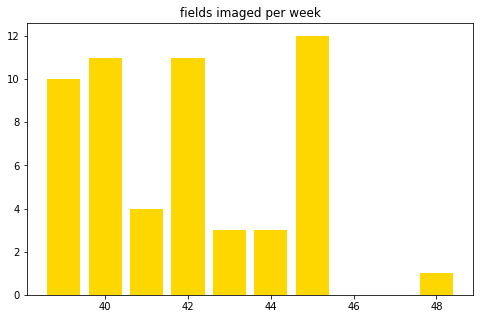

6.88 fields per week on average, from 8 active weeks


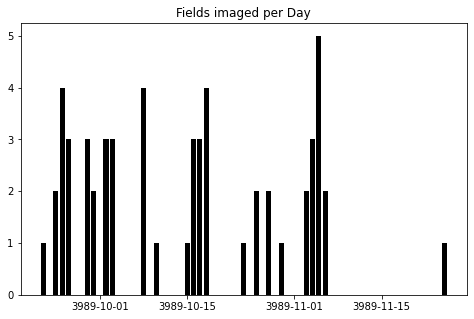

2.43 fields per day on average, from 23 active days


In [48]:
# How many fields were we able to image per week? per day? Include active weeks/days only
weeks = full_df.groupby('week').count()['_id']
dates = full_df.groupby('date').count()['_id']

week_fields = []
date_fields = []

for w in weeks.index:
    week_fields.append(len(full_df[full_df['week']==w].grower_farm_field.unique()))

plt.figure(figsize=(8,5))
plt.bar(weeks.index, week_fields, color='gold')
plt.title('fields imaged per week')
plt.show()

print(f'{np.mean(week_fields):.2f} fields per week on average, from {len(week_fields)} active weeks')

for d in dates.index:
    date_fields.append(len(full_df[full_df['date']==d].grower_farm_field.unique()))

plt.figure(figsize=(8,5))
plt.bar(dates.index, date_fields, color='black')
plt.title('Fields imaged per Day')
plt.show()

print(f'{np.mean(date_fields):.2f} fields per day on average, from {len(date_fields)} active days')

In [42]:
print(len(full_df['grower_farm_field'].unique()) /len(dates))
print(min(full_df['collected_on'].dt.date))
print(max(full_df['collected_on'].dt.date))

2.391304347826087
2020-09-21
2020-11-24


In [31]:
raw_tots = full_df[full_df['crop_name']=='WHEAT'].row_spacing.value_counts()
percentages = (raw_tots / np.sum(raw_tots))*100
percentages

CENTIMETERS_12_5        57.391684
CENTIMETERS_16_5        17.592708
CENTIMETERS_15          10.681733
INCHES_LESS_THAN_7_5     7.035835
OTHER                    5.112998
CENTIMETERS_45           2.185042
Name: row_spacing, dtype: float64

In [161]:
full_df.crop_health.unique()

array(['HEALTHY', 'STRESSED', 'NOT_APPLICABLE'], dtype=object)

In [103]:
var = 'furrow_depth_inches'
bc = full_df.groupby(['crop_name', var]).count()['_id'].reset_index()

crop = bc[bc['crop_name']== 'OTHER']
crop['pct'] = (crop['_id']/np.sum(crop['_id']))*100
crop

/home/williamroberts/code/brtdevkit/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,crop_name,furrow_depth_inches,_id,pct
3,OTHER,TwoToFourInches,1405,67.22488
4,OTHER,ZeroToFiveCentimeters,685,32.77512


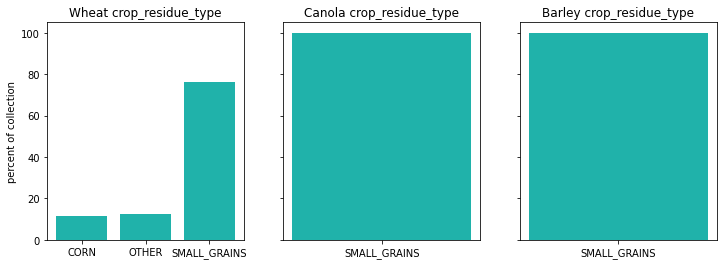

In [75]:
var = 'crop_residue_type'

bc = full_df.groupby(['crop_name', var]).count()['_id'].reset_index()

crops = ['WHEAT', 'RAPESEED', 'OTHER']

crop_dfs = []
for cr in crops:
    lm = bc[bc['crop_name']== cr]
    lm=lm[(lm[var]!='UNKNOWN' ) & (lm[var]!='NOT_APPLICABLE' )]
    lm['pct'] = (lm['_id']/np.sum(lm['_id']))*100
    crop_dfs.append(lm)

clr = 'lightseagreen'    

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
axs[0].bar(crop_dfs[0][var], crop_dfs[0]['pct'], color=clr)
axs[0].set_ylabel('percent of collection')
axs[0].set_title('Wheat ' + var)
axs[1].bar(crop_dfs[1][var], crop_dfs[1]['pct'], color=clr)
axs[1].set_title('Canola ' + var)
axs[2].bar(crop_dfs[2][var], crop_dfs[2]['pct'], color=clr)
axs[2].set_title('Barley ' + var)
plt.savefig('R2 ' + var +'.png')
plt.show()

In [138]:
var = 'soil_color'

bc = full_df.groupby(['crop_name', var]).count()['_id'].reset_index()

crops = ['WHEAT', 'RAPESEED', 'OTHER']

pcts = []
bc=bc[(bc[var]!='UNKNOWN' ) & (bc[var]!='NOT_APPLICABLE' )]
cr_var_levels = ['LOW', 'MEDIUM', 'HIGH']
sc_var_levels = ['LIGHT', 'MEDIUM', 'DARK']

for cr in crops:
    lm = bc[bc['crop_name']== cr]
    lm=lm[(lm[var]!='UNKNOWN' ) & (lm[var]!='NOT_APPLICABLE' )]
    br = np.sum(lm._id)
    for v in sc_var_levels:
        try:
            pcts.append(((int(lm[lm[var]==v]._id))/br)*100)
        except:
            pcts.append(0)

pcts

[20.2896741166188,
 63.95929579223374,
 15.751030091147458,
 19.534497090606816,
 80.46550290939318,
 0,
 26.746411483253592,
 73.25358851674642,
 0]

In [125]:
var = 'crop_residue'

bc = full_df.groupby(['crop_name', var]).count()['_id'].reset_index()

crops = ['WHEAT', 'RAPESEED', 'OTHER']

cr_pcts = []

bc=bc[(bc[var]!='UNKNOWN' ) & (bc[var]!='NOT_APPLICABLE' )]
cr_var_levels = ['LOW', 'MEDIUM', 'HIGH']
sc_var_levels = ['LIGHT', 'MEDIUM', 'DARK']
levels = cr_var_levels

for cr in crops:
    lm = bc[bc['crop_name']== cr]
    lm=lm[(lm[var]!='UNKNOWN' ) & (lm[var]!='NOT_APPLICABLE' )]
    br = np.sum(lm._id)
    for v in levels:
        try:
            cr_pcts.append(((int(lm[lm[var]==v]._id))/br)*100)
        except:
            cr_pcts.append(0)

cr_pcts

[48.345611187414164,
 46.33537270570608,
 5.31901610687976,
 52.558818478447535,
 32.199896960329724,
 15.241284561222738,
 43.014354066985646,
 30.239234449760765,
 0]

In [21]:
full_df.row_spacing.unique()

df =full_df[(full_df['row_spacing']!= 'NOT_APPLICABLE') & (full_df['row_spacing']!= 'OTHER')]

rs_levels = ['<15cm', '15-30cm', '30-45cm', '>45cm']
#df['grower'] = df['grower'].map(fix_grower_names).fillna(df['grower'])

space_dict = { 'INCHES_15':'30-45cm',
              'INCHES_LESS_THAN_7_5': '<15cm',
              'INCHES_7_5' : '15-30cm',
              'INCHES_20':'>45cm',
              'CENTIMETERS_12_5':'<15cm',
              'CENTIMETERS_16_5':'15-30cm',
              'CENTIMETERS_15':'15-30cm',
              'CENTIMETERS_45':'>45cm'}

def space(df):
    if df['row_spacing'] == 'INCHES_15':
        return '30-45cm'
    elif df['row_spacing'] == 'INCHES_LESS_THAN_7_5':
        return '<15cm'
    elif df['row_spacing'] == 'INCHES_7_5':
        return '15-30cm'
    elif df['row_spacing'] == 'INCHES_20':
        return '>45cm'
    elif df['row_spacing'] == 'CENTIMETERS_12_5':
        return '<15cm'
    elif df['row_spacing'] == 'CENTIMETERS_16_5':
        return '15-30cm'
    elif df['row_spacing'] == 'CENTIMETERS_15':
        return '15-30cm'
    elif df['row_spacing'] == 'CENTIMETERS_45':
        return '30-45cm'
    
df['row_spacing'] = df['row_spacing'].map(space_dict)


/home/williamroberts/code/brtdevkit/venv/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array(['30-45cm', '<15cm', '15-30cm', '>45cm'], dtype=object)

/home/williamroberts/code/brtdevkit/venv/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


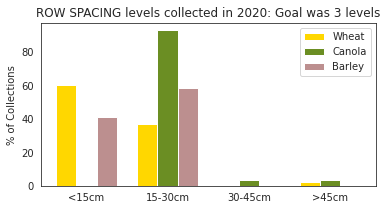

[60.48424238436739, 37.21297453779854, 0, 2.302783077834068]
[0, 92.79301745635911, 3.7240232751454694, 3.482959268495428]
[41.281138790035584, 58.718861209964416, 0, 0]


In [28]:
rs_levels = ['<15cm', '15-30cm', '30-45cm', '>45cm']
#df['grower'] = df['grower'].map(fix_grower_names).fillna(df['grower'])

space_dict = { 'INCHES_15':'30-45cm',
              'INCHES_LESS_THAN_7_5': '15-30cm',
              'INCHES_7_5' : '15-30cm',
              'INCHES_20':'>45cm',
              'CENTIMETERS_12_5':'<15cm',
              'CENTIMETERS_16_5':'15-30cm',
              'CENTIMETERS_15':'15-30cm',
              'CENTIMETERS_45':'>45cm'}

df =full_df[(full_df['row_spacing']!= 'NOT_APPLICABLE') & (full_df['row_spacing']!= 'OTHER')]
df['row_spacing'] = df['row_spacing'].map(space_dict)
bc = df.groupby(['crop_name','row_spacing']).count()['_id'].reset_index()

rs_var_levels = [ '<15cm', '15-30cm', '30-45cm', '>45cm']
crops = ['WHEAT', 'RAPESEED', 'OTHER']
rs_pcts = []
var = 'row_spacing'
for cr in crops:
    lm = bc[bc['crop_name']== cr]
    lm=lm[lm[var].isin(rs_var_levels)]
    br = np.sum(lm._id)
    for v in rs_var_levels:
        try:
            rs_pcts.append((int(lm[lm[var]==v]._id)/br)*100)
        except:
            rs_pcts.append(0)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

crop_correct = ['Wheat', 'Canola', 'Barley']
rs_var_levels = [ '<15cm', '15-30cm', '30-45cm', '>45cm']
N = 4
levels = rs_var_levels
ind = np.arange(N)  # the x locations for the groups
width = 0.25       # the width of the bars

fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
b1 = ax.bar(ind, rs_pcts[0:4], width, color='gold')
b2 = ax.bar(ind+width, rs_pcts[4:8], width, color= 'olivedrab')
b3 = ax.bar(ind+width*2, rs_pcts[8:12], width, color = 'rosybrown')

# add some
ax.set_ylabel('% of Collections')
ax.set_title('ROW SPACING levels collected in 2020: Goal was 3 levels')
ax.set_xticks(ind + width)
ax.legend(crop_correct)
levels = rs_var_levels
ax.set_xticklabels( (levels[0], levels[1], levels[2] , levels[3]))
#plt.savefig('R2_row_spacing.png', dpi=100)
plt.show()
print(rs_pcts[0:4])
print(rs_pcts[4:8])
print(rs_pcts[8:12])

In [19]:
rs_pcts

[67.8992038949931,
 29.798013027172843,
 0,
 2.302783077834068,
 41.5211970074813,
 51.271820448877804,
 3.7240232751454694,
 3.482959268495428,
 60.213523131672595,
 39.786476868327405,
 0,
 0]

In [211]:
var = 'cloud_cover'

bc = df.groupby(['crop_name', 'operating_field_name',var]).count()['_id'].reset_index()

crops = ['WHEAT', 'RAPESEED', 'OTHER']

cc_pcts = []
bc=bc[(bc[var]!='UNKNOWN' ) & (bc[var]!='NOT_APPLICABLE' )]
cr_var_levels = ['LOW', 'MEDIUM', 'HIGH']
sc_var_levels = ['LIGHT', 'MEDIUM', 'DARK']
rs_var_levels = [ '<15cm', '15-30cm', '30-45cm', '>45cm']
ch_var_levels = ['HEALTHY', 'STRESSED']
wp_var_levels = ['LOW', 'MEDIUM', 'HIGH']
cc_var_levels = ['SUNNY', 'PARTLY CLOUDY', 'CLOUDY']
levels = cc_var_levels

for cr in crops:
    lm = bc[bc['crop_name']== cr]
    lm=lm[(lm[var]!='UNKNOWN' ) & (lm[var]!='NOT_APPLICABLE' )]
    #br = np.sum(lm._id)
    for v in levels:
        try:
            #wp_pcts.append(((int(lm[lm[var]==v]._id))/br)*100)
            cc_pcts.append(len(lm[lm[var]==v]))
        except:
            cc_pcts.append(0)

(cc_pcts)

[7, 6, 7, 16, 6, 2, 0, 1, 2]

In [210]:
bc.cloud_cover.unique()

array(['SUNNY', 'CLOUDY', 'PARTLY CLOUDY'], dtype=object)

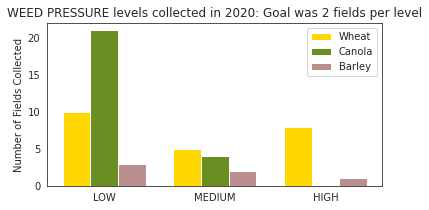

In [196]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

crop_correct = ['Wheat', 'Canola', 'Barley']

N = 3
levels = wp_var_levels
ind = np.arange(N)  # the x locations for the groups
width = 0.25       # the width of the bars

pcts = wp_pcts
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
b1 = ax.bar(ind, pcts[0:3], width, color='gold')
b2 = ax.bar(ind+width, pcts[3:6], width, color= 'olivedrab')
b3 = ax.bar(ind+width*2, pcts[6:9], width, color = 'rosybrown')

# add some
ax.set_ylabel('Number of Fields Collected')
ax.set_title('WEED PRESSURE levels collected in 2020: Goal was 2 fields per level')
ax.set_xticks(ind + width)
ax.legend(crop_correct)
ax.set_xticklabels( (levels[0], levels[1], levels[2]))
plt.savefig('R2_weed_pressure.png', dpi=100)
plt.show()

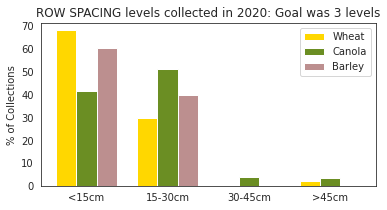

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

crop_correct = ['Wheat', 'Canola', 'Barley']
rs_var_levels = [ '<15cm', '15-30cm', '30-45cm', '>45cm']
N = 4
levels = rs_var_levels
ind = np.arange(N)  # the x locations for the groups
width = 0.25       # the width of the bars


pcts = rs_pcts
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
b1 = ax.bar(ind, pcts[0:4], width, color='gold')
b2 = ax.bar(ind+width, pcts[4:8], width, color= 'olivedrab')
b3 = ax.bar(ind+width*2, pcts[8:12], width, color = 'rosybrown')

# add some
ax.set_ylabel('% of Collections')
ax.set_title('ROW SPACING levels collected in 2020: Goal was 3 levels')
ax.set_xticks(ind + width)
ax.legend(crop_correct)
levels = rs_var_levels
ax.set_xticklabels( (levels[0], levels[1], levels[2] , levels[3]))
plt.savefig('R2_row_spacing.png', dpi=100)
plt.show()

In [198]:
full_df.cloud_cover.unique()

array(['CLEAR', 'FEW', 'SCATTERED', 'OVERCAST', 'BROKEN'], dtype=object)

In [201]:
cloud_dict= {'CLEAR':'SUNNY', 'FEW':'SUNNY', 'SCATTERED': 'PARTLY CLOUDY', 'OVERCAST':'CLOUDY', 'BROKEN':'PARTLY CLOUDY'}

df =full_df[(full_df['cloud_cover']!= 'NOT_APPLICABLE') & (full_df['cloud_cover']!= 'OTHER')]
df['cloud_cover'] = df['cloud_cover'].map(cloud_dict)
#.fillna(df['grower'])
df.cloud_cover.unique()

array(['SUNNY', 'PARTLY CLOUDY', 'CLOUDY'], dtype=object)

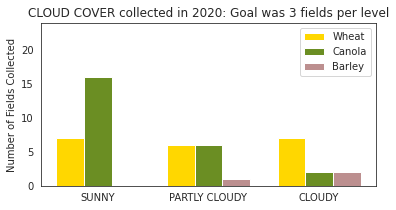

In [233]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

crop_correct = ['Wheat', 'Canola', 'Barley']
cc_var_levels = ['SUNNY', 'PARTLY CLOUDY', 'CLOUDY']
N = 3
levels = cc_var_levels
ind = np.arange(N)  # the x locations for the groups
width = 0.25       # the width of the bars


pcts = cc_pcts
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
b1 = ax.bar(ind, pcts[0:3], width, color='gold')
b2 = ax.bar(ind+width, pcts[3:6], width, color= 'olivedrab')
b3 = ax.bar(ind+width*2, pcts[6:9], width, color = 'rosybrown')

# add some
ax.set_ylabel('Number of Fields Collected')
ax.set_title('CLOUD COVER collected in 2020: Goal was 3 fields per level')
ax.set_xticks(ind + width)
ax.set_ylim(0,24)
ax.legend(crop_correct)
levels = cc_var_levels
ax.set_xticklabels( (levels[0], levels[1], levels[2]))
plt.savefig('R2_cloud_cover.png', dpi=100)
plt.show()